In [1]:
import math

import numpy as np

import cnn
import utils
import hmm

Using TensorFlow backend.


In [2]:
x = 2
y = np.array(['a', 'b', 'c'])
s = np.array([1.0, 0.0])

real_hmm_train = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.3, 0.7],
        [0.1, 0.9]
    ]),
    b=np.array([
        [0.6, 0.4, 0.0],
        [0.0, 0.0, 1.0]
    ]),
    s=s
)

real_hmm_val = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.5, 0.5],
        [0.2, 0.8]
    ]),
    b=np.array([
        [0.1, 0.7, 0.2],
        [0.8, 0.0, 0.2]
    ]),
    s=s
)

In [3]:
epoch_size = 100
batch_size = 50
seq_len = 10

train_data_gen = utils.HMMDataGenerator(
    real_hmm_train,
    epoch_size,
    batch_size,
    seq_len
)

val_data_gen = utils.HMMDataGenerator(
    real_hmm_val,
    epoch_size,
    batch_size,
    seq_len
)

In [5]:
model = cnn.CNNModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 4)              40        
_________________________________________________________________
activation_1 (Activation)    (None, 8, 4)              0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

In [6]:
epochs = 20

history = model.fit_generator(
    generator=train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    use_multiprocessing=True,
    workers=4
)

Epoch 1/20
100/100 [==============================] - 2s 21ms/step - loss: 0.6326 - accuracy: 0.7476 - val_loss: 0.6779 - val_accuracy: 0.3788
Epoch 2/20
100/100 [==============================] - 2s 18ms/step - loss: 0.5318 - accuracy: 0.8062 - val_loss: 0.8049 - val_accuracy: 0.3502
Epoch 3/20
100/100 [==============================] - 2s 19ms/step - loss: 0.4432 - accuracy: 0.8138 - val_loss: 1.0046 - val_accuracy: 0.3494
Epoch 4/20
100/100 [==============================] - 2s 17ms/step - loss: 0.3987 - accuracy: 0.8136 - val_loss: 1.1077 - val_accuracy: 0.3504
Epoch 5/20
100/100 [==============================] - 2s 17ms/step - loss: 0.3775 - accuracy: 0.8150 - val_loss: 1.3194 - val_accuracy: 0.3550
Epoch 6/20
100/100 [==============================] - 2s 17ms/step - loss: 0.3672 - accuracy: 0.8208 - val_loss: 1.4274 - val_accuracy: 0.3726
Epoch 7/20
100/100 [==============================] - 2s 18ms/step - loss: 0.3597 - accuracy: 0.8364 - val_loss: 1.4653 - val_accuracy: 0.3760

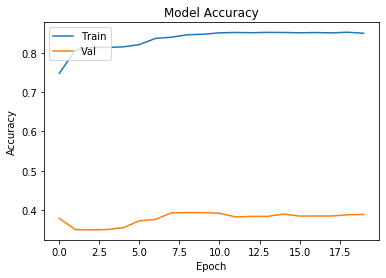

In [7]:
utils.plot_acc(history)

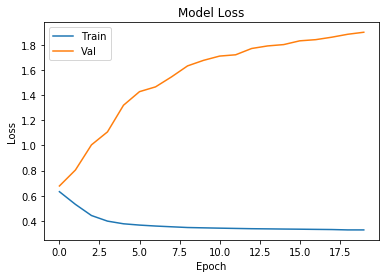

In [8]:
utils.plot_loss(history)

In [9]:
test_X = real_hmm_train.simulate(seq_len, reset_before=True)[1]
print(test_X)
test_X = np.array([train_data_gen._encode_hmm_outputs(test_X)])
print(test_X)

['a' 'a' 'a' 'c' 'c' 'c' 'a' 'a' 'c' 'a']
[[[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [1. 0. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [1. 0. 0.]]]


In [10]:
p = model.predict(test_X)
print(p)

[[0.7387927]]


In [11]:
pred_real = bool(round(p[0][0]))
print(f'Predict real?: {pred_real}')

Predict real?: True


In [12]:
model2 = cnn.CNNModel2()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 8, 4)              40        
_________________________________________________________________
activation_4 (Activation)    (None, 8, 4)              0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 4)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 8)              104       
_________________________________________________________________
activation_5 (Activation)    (None, 2, 8)              0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [13]:
history2 = model2.fit_generator(
    generator=train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    # MP causes error: libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
#     use_multiprocessing=True,
#     workers=4
)

Epoch 1/20
  7/100 [=>............................] - ETA: 11s - loss: 0.6676 - accuracy: 0.7029

/Users/sam/anaconda3/envs/fyp/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.121586). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/Users/sam/anaconda3/envs/fyp/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.116223). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


100/100 [==============================] - 7s 66ms/step - loss: 0.5601 - accuracy: 0.8514 - val_loss: 0.7610 - val_accuracy: 0.4106
Epoch 2/20
100/100 [==============================] - 6s 63ms/step - loss: 0.3325 - accuracy: 0.8922 - val_loss: 1.3445 - val_accuracy: 0.4586
Epoch 3/20
100/100 [==============================] - 6s 65ms/step - loss: 0.2350 - accuracy: 0.9066 - val_loss: 1.7431 - val_accuracy: 0.4256
Epoch 4/20
100/100 [==============================] - 6s 61ms/step - loss: 0.2520 - accuracy: 0.9040 - val_loss: 1.8875 - val_accuracy: 0.4434
Epoch 5/20
100/100 [==============================] - 6s 60ms/step - loss: 0.2159 - accuracy: 0.9154 - val_loss: 1.8999 - val_accuracy: 0.4258
Epoch 6/20
100/100 [==============================] - 6s 60ms/step - loss: 0.2811 - accuracy: 0.8936 - val_loss: 1.7297 - val_accuracy: 0.4308
Epoch 7/20
100/100 [==============================] - 6s 65ms/step - loss: 0.2563 - accuracy: 0.8932 - val_loss: 1.6951 - val_accuracy: 0.4420
Epoch 8/20

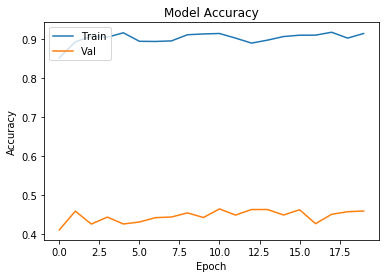

In [14]:
utils.plot_acc(history2)

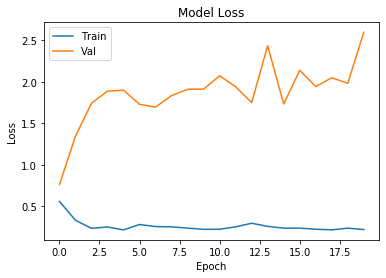

In [15]:
utils.plot_loss(history2)